In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [158]:
df = pd.read_csv(r"E:\PROJECTS\Customer Categorizer\notebooks\marketing_campaign.csv", sep="\t")
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04-09-2012       58       635  ...                  7   
1            1  08-03-2014       38        11  ...                  5   
2            0  21-08-2013       26       426  ...                  4   
3            0  10-02-2014       26        11  ...                  6   
4            0  19-01-2014       94       173  ...                  5   
...        ...         ...      ...       ...  ...                ...   
2235         1  13-06-2013       46       709  ...                  5   
2236         1  10-06-2014       56       406  ...                  7   
2237         0  25-01-2014       91       908  ...                  6   
2238         1  24-01-2014        8       428  ...                  3   
2239         1  15-10-2012       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2240 rows x 29 columns]

# Data Cleaning

### Handeling Missing Values
* Handeling Missing Values
* Handeling Duplicates
* Check Data types
* Understand the dataset

### Check Null Values

In [159]:
featuers_with_na = [feature for feature in df.columns if df[feature].isnull().sum()>=1]
for feature in featuers_with_na:
    print(feature, np.round(df[feature].isnull().mean()*100,5),  "% missing values")

Income 1.07143 % missing values


In [160]:
df[featuers_with_na].describe()

Income
count    2216.000000
mean    52247.251354
std     25173.076661
min      1730.000000
25%     35303.000000
50%     51381.500000
75%     68522.000000
max    666666.000000

### Imputing Null Values

In [161]:
df.Income.fillna(df.Income.median(), inplace=True)
df.Income.isnull().sum()

np.int64(0)

##  Other Data Cleaning Steps

Handeling Duplicates

In [162]:
df.duplicated().sum()

np.int64(0)

Remove Z_CostContact and Z_Revenue

In [163]:
columns_to_drop = ['Z_CostContact', 'Z_Revenue', 'ID']
for col in columns_to_drop:
    if col in df.columns:
        df.drop(col, axis=1, inplace=True) 
        print(f"Dropped column: {col}")

Dropped column: Z_CostContact
Dropped column: Z_Revenue
Dropped column: ID


# Feature Enginerring

## We'll Repeate some steps from EDA

In [164]:
# create new column for feature

from datetime import datetime


df = df.copy()

##  creating a new field to store the Age of the customer
df['Age']=2022-df['Year_Birth']   

###  recoding the customer's education level to numeric form (0: high-school, 1: diploma, 2: bachelors, 3: masters, and 4: doctorates)
df["Education"].replace({"Basic":0,"2n Cycle":1, "Graduation":2, "Master":3, "PhD":4},inplace=True)  

#  recoding the customer's marital status to numeric form (0: not living with a partner, 1: living with a partner) 
df['Marital_Status'].replace({"Married":1, "Together":1, "Absurd":0, "Widow":0, "YOLO":0, "Divorced":0, "Single":0,"Alone":0},inplace=True) 

#  creating a new field to store the number of children in the household
df['Children']=df['Kidhome']+df['Teenhome']

#creating Family_Size
df['Family_Size']=df['Marital_Status']+df['Children']+1



#  creating a new field to store the total spending of the customer
df['Total_Spending']=df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]
df["Total Promo"] =  df["AcceptedCmp1"]+ df["AcceptedCmp2"]+ df["AcceptedCmp3"]+ df["AcceptedCmp4"]+ df["AcceptedCmp5"]

## The following code works out how long the customer has been with the company and store the total number of promotions the customers responded to
df['Dt_Customer']=pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
today=datetime.today()
df['Days_as_Customer']=(today-df['Dt_Customer']).dt.days
df['Offers_Responded_To']=df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']+df['Response']
df["Parental Status"] = np.where(df["Children"] > 0, 1, 0)






#dropping columns which are already used to create new features
columns_to_drop = ['Year_Birth','Kidhome','Teenhome']
df.drop(columns = columns_to_drop, axis = 1, inplace=True)
df.rename(columns={"Marital_Status": "Marital Status","MntWines": "Wines","MntFruits":"Fruits",
                   "MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets",
                   "MntGoldProds":"Gold","NumWebPurchases": "Web","NumCatalogPurchases":"Catalog",
                   "NumStorePurchases":"Store","NumDealsPurchases":"Discount Purchases"},
          inplace = True)

df = df[["Age","Education","Marital Status","Parental Status","Children","Income","Total_Spending","Days_as_Customer","Recency","Wines","Fruits","Meat","Fish","Sweets","Gold","Web","Catalog","Store","Discount Purchases","Total Promo","NumWebVisitsMonth"]]

In [165]:
df

Age  Education  Marital Status  Parental Status  Children   Income  \
0      65          2               0                0         0  58138.0   
1      68          2               0                1         2  46344.0   
2      57          2               1                0         0  71613.0   
3      38          2               1                1         1  26646.0   
4      41          4               1                1         1  58293.0   
...   ...        ...             ...              ...       ...      ...   
2235   55          2               1                1         1  61223.0   
2236   76          4               1                1         3  64014.0   
2237   41          2               0                0         0  56981.0   
2238   66          3               1                1         1  69245.0   
2239   68          4               1                1         2  52869.0   

      Total_Spending  Days_as_Customer  Recency  Wines  ...  Meat  Fish  \
0               1617              4872       58    635  ...   546   172   
1                 27              4322       38     11  ...     6     2   
2                776              4521       26    426  ...   127   111   
3                 53              4348       26     11  ...    20    10   
4                422              4370       94    173  ...   118    46   
...              ...               ...      ...    ...  ...   ...   ...   
2235            1341              4590       46    709  ...   182    42   
2236             444              4228       56    406  ...    30     0   
2237            1241              4364       91    908  ...   217    32   
2238             843              4365        8    428  ...   214    80   
2239             172              4831       40     84  ...    61     2   

      Sweets  Gold  Web  Catalog  Store  Discount Purchases  Total Promo  \
0         88    88    8       10      4                   3            0   
1          1     6    1        1      2                   2            0   
2         21    42    8        2     10                   1            0   
3          3     5    2        0      4                   2            0   
4         27    15    5        3      6                   5            0   
...      ...   ...  ...      ...    ...                 ...          ...   
2235     118   247    9        3      4                   2            0   
2236       0     8    8        2      5                   7            1   
2237      12    24    2        3     13                   1            1   
2238      30    61    6        5     10                   2            0   
2239       1    21    3        1      4                   3            0   

      NumWebVisitsMonth  
0                     7  
1                     5  
2                     4  
3                     6  
4                     5  
...                 ...  
2235                  5  
2236                  7  
2237                  6  
2238                  3  
2239                  7  

[2240 rows x 21 columns]

## Type of Features

Numerical Features

In [166]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
len(numerical_features)

21

Categorical Features

In [167]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
len(categorical_features)

0

Discrete Features

In [168]:
discrete_features = [feature for feature in numerical_features if len(df[feature].unique())<25]
print(len(discrete_features))

10


Continuous Features

In [169]:
continuous_features = [feature for feature in numerical_features if feature not in discrete_features]
print(len(continuous_features))

11


**We can see there are some Multicollinearity in this dataset**

# Check Outlier and Capping it

### Using IQR for outlier handeling

**Visulising the outliers first**

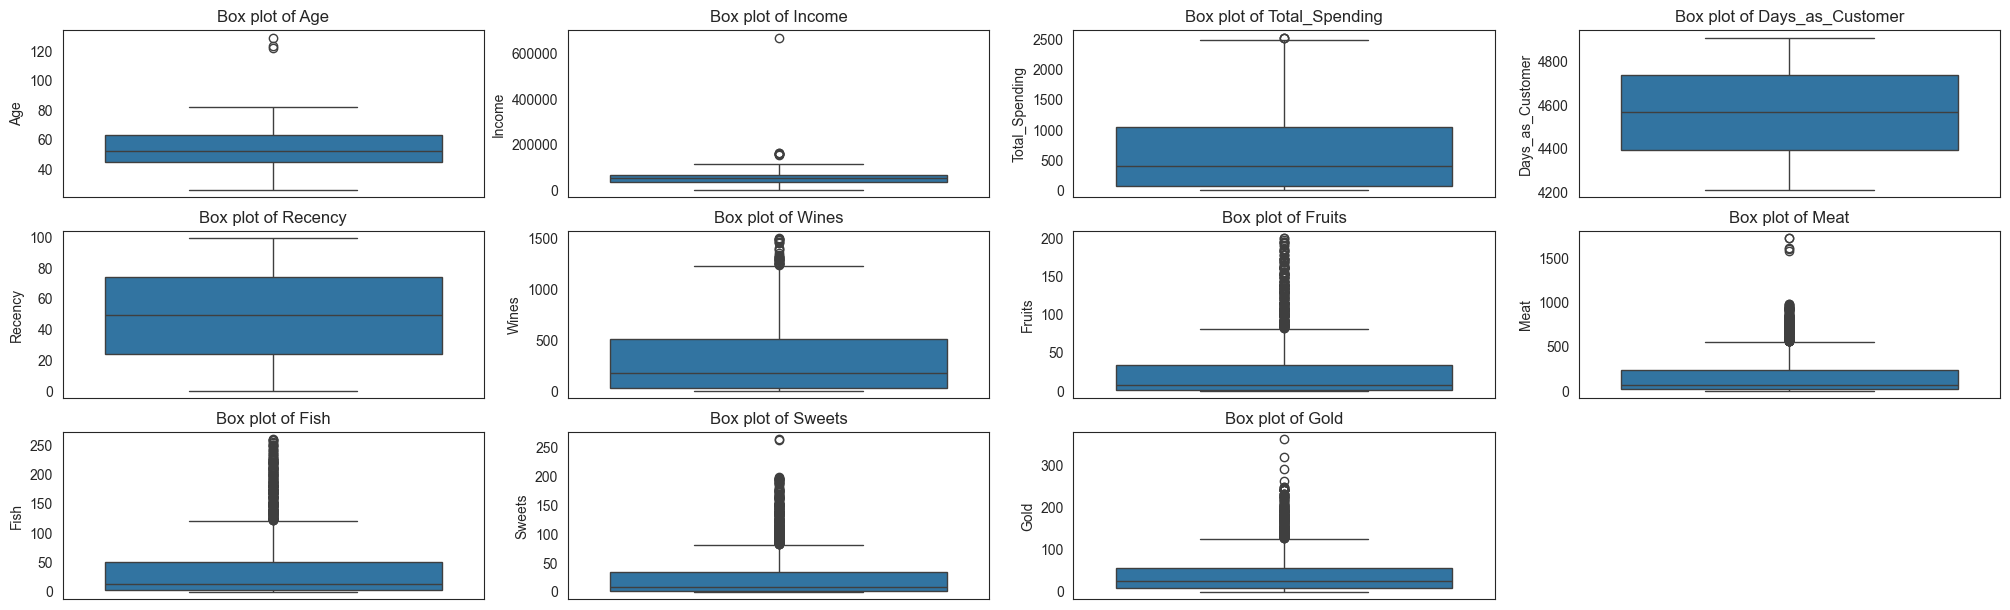

In [170]:
# Using box plot
plt.figure(figsize=(25,10))
for i in range(len(continuous_features)):
    plt.subplot(4,4,i+1)
    sns.boxplot(df[continuous_features[i]])
    plt.title(f'Box plot of {continuous_features[i]}')
plt.show()

* Since removing the outlier rows can delete some essential data information
* So we do caping
* Values > upperLimit set to upperLimit
* Values < lowerLimit set to lowerLimit

In [171]:
def detect_outliers(df, feature):
    
    print(f"###### Feature: {feature} ######")
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    
    print(f"Q1: {Q1}, \nQ3: {Q3}")
    
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    print(f"Lower Bound: {lower_bound}, \nUpper Bound: {upper_bound}")
    
    df.loc[df[feature] < lower_bound, feature] = lower_bound
    df.loc[df[feature] > upper_bound, feature] = upper_bound
    
    print("--------------------------------")
    return df

In [172]:
for col in continuous_features:
    df = detect_outliers(df, col)
df

###### Feature: Age ######
Q1: 45.0, 
Q3: 63.0
Lower Bound: 18.0, 
Upper Bound: 90.0
--------------------------------
###### Feature: Income ######
Q1: 35538.75, 
Q3: 68289.75
Lower Bound: -13587.75, 
Upper Bound: 117416.25
--------------------------------
###### Feature: Total_Spending ######
Q1: 68.75, 
Q3: 1045.5
Lower Bound: -1396.375, 
Upper Bound: 2510.625
--------------------------------
###### Feature: Days_as_Customer ######
Q1: 4389.75, 
Q3: 4738.0
Lower Bound: 3867.375, 
Upper Bound: 5260.375
--------------------------------
###### Feature: Recency ######
Q1: 24.0, 
Q3: 74.0
Lower Bound: -51.0, 
Upper Bound: 149.0
--------------------------------
###### Feature: Wines ######
Q1: 23.75, 
Q3: 504.25
Lower Bound: -697.0, 
Upper Bound: 1225.0
--------------------------------
###### Feature: Fruits ######
Q1: 1.0, 
Q3: 33.0
Lower Bound: -47.0, 
Upper Bound: 81.0
--------------------------------
###### Feature: Meat ######
Q1: 16.0, 
Q3: 232.0
Lower Bound: -308.0, 
Upper Bound: 55

Age  Education  Marital Status  Parental Status  Children   Income  \
0      65          2               0                0         0  58138.0   
1      68          2               0                1         2  46344.0   
2      57          2               1                0         0  71613.0   
3      38          2               1                1         1  26646.0   
4      41          4               1                1         1  58293.0   
...   ...        ...             ...              ...       ...      ...   
2235   55          2               1                1         1  61223.0   
2236   76          4               1                1         3  64014.0   
2237   41          2               0                0         0  56981.0   
2238   66          3               1                1         1  69245.0   
2239   68          4               1                1         2  52869.0   

      Total_Spending  Days_as_Customer  Recency  Wines  ...  Meat   Fish  \
0             1617.0            4872.0       58    635  ...   546  120.5   
1               27.0            4322.0       38     11  ...     6    2.0   
2              776.0            4521.0       26    426  ...   127  111.0   
3               53.0            4348.0       26     11  ...    20   10.0   
4              422.0            4370.0       94    173  ...   118   46.0   
...              ...               ...      ...    ...  ...   ...    ...   
2235          1341.0            4590.0       46    709  ...   182   42.0   
2236           444.0            4228.0       56    406  ...    30    0.0   
2237          1241.0            4364.0       91    908  ...   217   32.0   
2238           843.0            4365.0        8    428  ...   214   80.0   
2239           172.0            4831.0       40     84  ...    61    2.0   

      Sweets   Gold  Web  Catalog  Store  Discount Purchases  Total Promo  \
0         81   88.0    8       10      4                   3            0   
1          1    6.0    1        1      2                   2            0   
2         21   42.0    8        2     10                   1            0   
3          3    5.0    2        0      4                   2            0   
4         27   15.0    5        3      6                   5            0   
...      ...    ...  ...      ...    ...                 ...          ...   
2235      81  126.5    9        3      4                   2            0   
2236       0    8.0    8        2      5                   7            1   
2237      12   24.0    2        3     13                   1            1   
2238      30   61.0    6        5     10                   2            0   
2239       1   21.0    3        1      4                   3            0   

      NumWebVisitsMonth  
0                     7  
1                     5  
2                     4  
3                     6  
4                     5  
...                 ...  
2235                  5  
2236                  7  
2237                  6  
2238                  3  
2239                  7  

[2240 rows x 21 columns]

**Checking Skwenwss after outlier Capping**

In [173]:
df[continuous_features].skew(axis = 0, skipna = True).sort_values(ascending=False)

Fruits              1.233953
Fish                1.230822
Meat                1.213585
Sweets              1.213346
Gold                1.111307
Wines               1.096611
Total_Spending      0.860245
Age                 0.120199
Income              0.090027
Recency            -0.001987
Days_as_Customer   -0.015216
dtype: float64

# Feature Transformation

## Scaling

In [174]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
outlier_features = ['Wines', 'Fruits', 'Meat', 'Fish','Sweets', 'Gold', 'Total_Spending', "Age"]
numeric_features= [feature for feature in numeric_features if feature not in outlier_features]
print(numerical_features)
print(outlier_features)

['Age', 'Education', 'Marital Status', 'Parental Status', 'Children', 'Income', 'Total_Spending', 'Days_as_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'Web', 'Catalog', 'Store', 'Discount Purchases', 'Total Promo', 'NumWebVisitsMonth']
['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'Total_Spending', 'Age']


In [175]:
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.compose import ColumnTransformer 
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [176]:
dataC = df.copy()
numeric_pipeline = Pipeline(
    steps = [
        ("Imputer", SimpleImputer(strategy='constant', fill_value=0)),
        ("StandardScaler", StandardScaler())
    ]
)

outlier_features_pipeline = Pipeline(
    steps=[
        ("Imputer", SimpleImputer(strategy="constant", fill_value=0)),
        ("transformer", PowerTransformer(standardize=True)),
    ]
)

preprocessor = ColumnTransformer(
    [
        ("numeric pipeline", numeric_pipeline, numeric_features),
        ("outlier feature pipeline", outlier_features_pipeline, outlier_features)
    ],
    remainder="passthrough"
)

In [177]:
columns = dataC.columns
dataC = preprocessor.fit_transform(dataC)
scaled_data = pd.DataFrame(data = dataC, columns=columns)
print("After Scaling")
scaled_data

After Scaling


Age  Education  Marital Status  Parental Status  Children  \
0    -0.458383  -1.346874       -1.584605        -1.264505  0.299651   
1    -0.458383  -1.346874        0.631072         1.396361 -0.263808   
2    -0.458383   0.742460       -1.584605        -1.264505  0.943420   
3    -0.458383   0.742460        0.631072         0.065928 -1.204881   
4     1.533425   0.742460        0.631072         0.065928  0.307056   
...        ...        ...             ...              ...       ...   
2235 -0.458383   0.742460        0.631072         0.065928  0.447037   
2236  1.533425   0.742460        0.631072         2.726794  0.580377   
2237 -0.458383  -1.346874       -1.584605        -1.264505  0.244375   
2238  0.537521   0.742460        0.631072         0.065928  0.830288   
2239  1.533425   0.742460        0.631072         1.396361  0.047924   

        Income  Total_Spending  Days_as_Customer   Recency     Wines  ...  \
0     1.531185        0.307039          1.409304  2.510890 -0.550785  ...   
1    -1.190545       -0.383664         -1.110409 -0.568720 -1.166125  ...   
2    -0.205773       -0.798086          1.409304 -0.226541  1.295237  ...   
3    -1.061881       -0.798086         -0.750450 -0.910898 -0.550785  ...   
4    -0.953012        1.550305          0.329427  0.115638  0.064556  ...   
...        ...             ...               ...       ...       ...  ...   
2235  0.135680       -0.107383          1.769263  0.115638 -0.550785  ...   
2236 -1.655713        0.237969          1.409304 -0.226541 -0.243114  ...   
2237 -0.982703        1.446700         -0.750450  0.115638  2.218248  ...   
2238 -0.977755       -1.419719          0.689386  0.799996  1.295237  ...   
2239  1.328292       -0.314594         -0.390491 -0.568720 -0.550785  ...   

          Meat      Fish    Sweets      Gold       Web   Catalog     Store  \
0    -0.439037  0.693904  1.062784  1.487681  1.504406  1.493989  1.474200   
1    -0.439037 -0.130463 -1.211545 -1.001121 -1.376502 -0.889143 -0.987648   
2    -0.439037 -0.542647  0.748918  1.145877  0.456428  1.435812  0.579704   
3    -0.439037  0.281720 -1.211545 -0.403311 -0.722233 -0.110828 -0.542753   
4    -0.439037 -0.130463  0.123712  1.058075  0.406278  0.832291  0.741799   
...        ...       ...       ...       ...       ...       ...       ...   
2235 -0.439037 -0.130463  1.153805  1.058075  0.705632  0.772188  1.474200   
2236  1.035390  0.693904  0.712718 -1.446458 -0.479346 -1.502516 -1.426040   
2237  1.035390  0.281720  1.365262  1.131987  0.829676  0.595178  0.228963   
2238 -0.439037 -0.954831  0.752462  0.818633  0.819805  1.206988  0.810460   
2239 -0.439037  0.693904 -0.303497 -0.549859 -0.032242 -0.889143 -0.987648   

      Discount Purchases  Total Promo  NumWebVisitsMonth  
0               1.196801     1.315365           1.005341  
1              -0.967034    -1.441417           1.239521  
2               0.473642     0.661170           0.361223  
3              -1.069040    -1.117211          -1.315014  
4              -0.368949     0.179322          -1.033428  
...                  ...          ...                ...  
2235            1.590701     1.140457           0.195287  
2236           -0.794538     0.217559           1.846727  
2237           -0.007089     1.069706          -1.033428  
2238            0.825585     0.730787           1.083819  
2239           -0.113728    -0.441818           1.239521  

[2240 rows x 21 columns]

In [178]:
columns

Index(['Age', 'Education', 'Marital Status', 'Parental Status', 'Children',
       'Income', 'Total_Spending', 'Days_as_Customer', 'Recency', 'Wines',
       'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'Web', 'Catalog', 'Store',
       'Discount Purchases', 'Total Promo', 'NumWebVisitsMonth'],
      dtype='object')

# Model Building (Clustering)

**4 Algorithms**
* K Means Clustering
* Agglomerative Clustering
* Gaussian Mixture
* DBSCAN

### Create a function for Silhouette Score Plot

In [179]:
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib import cm

In [180]:
def silhouette_plot(model, range_n_clusters, X_clustering, pca, **kwargs):
    for n_clusters in range_n_clusters:
        fig, (ax1, ax2) = plt.subplots(1,2)
        fig.set_size_inches(18,7)
        
        ax1.set_xlim([-0.1, 1])
        
        ax1.set_ylim([0, len(X_clustering) + (n_clusters + 1)*10])
        
        clusterer = model(n_clusters, **kwargs)
        cluster_label = clusterer.fit_predict(X_clustering)
        
        silhouette_avg = silhouette_score(X_clustering, cluster_label)
        
        print(
            "For n_clusters",
            n_clusters,
            "The average silhoutte score is:",
            silhouette_avg
        )
        
        # Compute the silhoutte score for each sample
        sample_silhoutte_values = silhouette_samples(X_clustering, cluster_label)
        
        y_lower = 10
        for i in range(n_clusters):
            ith_cluster_silhoutte_values = sample_silhoutte_values[cluster_label == i]
            
            ith_cluster_silhoutte_values.sort()
            
            size_cluster_i = ith_cluster_silhoutte_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhoutte_values,
                facecolor = color, 
                edgecolor = color,
                alpha = 0.7
            )
            
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            
            y_lower = y_upper + 10

        ax1.set_title("The silhoutte plot for the various clusters.")
        ax1.set_xlabel("The silhoutte coefficient values")
        ax1.set_ylabel("Cluster label")
        
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
        
        ax1.set_yticks([])
        ax1.set_xticks([-0.2, -0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        sns.scatterplot(
            x=pca[:,0],
            y=pca[:,1],
            hue=cluster_label,
            palette=sns.color_palette("hsv", n_clusters),
            ax=ax2,
            legend="full",
            alpha=0.7
        )
        
        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st Feature")
        ax2.set_ylabel("Feature space for the 2nd Feature")
        
        plt.suptitle(
            ("Silhouette analysis for KMeans clustering on sample data "
             "with n_clusters = %d" % n_clusters),
            fontsize=14,
            fontweight="bold",
        )
    plt.show()
        
            
            

## PCA Principle Component Analysis

In [181]:
# Applying PCA

from sklearn.decomposition import PCA
df_scaled = scaled_data.copy()
var_ratio = {}
for n in range(2, 18):
    pc = PCA(n_components=n)
    df_pca = pc.fit(df_scaled)
    var_ratio[n] = sum(pc.explained_variance_ratio_)



In [182]:
var_ratio

{2: np.float64(0.5032166285425386),
 3: np.float64(0.5815487932389074),
 4: np.float64(0.6336676524235338),
 5: np.float64(0.6820445742819766),
 6: np.float64(0.7291329923033498),
 7: np.float64(0.7717213761160938),
 8: np.float64(0.8099929933829789),
 9: np.float64(0.8397210974401926),
 10: np.float64(0.8661800742685034),
 11: np.float64(0.8877812392612573),
 12: np.float64(0.9091257290533798),
 13: np.float64(0.9280689459363466),
 14: np.float64(0.9427962984636841),
 15: np.float64(0.9568358124958835),
 16: np.float64(0.9702786015431368),
 17: np.float64(0.9814491565240524)}

### Choosing PCA n_components and Kmeans n_clusters based on Clustering metrices

In [183]:
# Apply PCA and display clustering metrics
from sklearn.cluster import KMeans
for y in range(2, 8):
    print("PCA with # of components:", y)
    pca = PCA(n_components=y)
    data_p = pca.fit_transform(df_scaled)
    for x in range(2 , 7):
        kmeans = KMeans(n_clusters=x, random_state=42)
        label = kmeans.fit_predict(data_p)
        print("Silhouette score for", x, "clusters:", silhouette_score(data_p, label), "Inertia:", kmeans.inertia_)
    print()

PCA with # of components: 2
Silhouette score for 2 clusters: 0.5284429223956952 Inertia: 9060.843259397469
Silhouette score for 3 clusters: 0.5101521116129856 Inertia: 5130.382226593732
Silhouette score for 4 clusters: 0.4536650608591974 Inertia: 3978.6646960092708
Silhouette score for 5 clusters: 0.4283672868472654 Inertia: 3312.6085365034246
Silhouette score for 6 clusters: 0.3885916022968819 Inertia: 2839.8392642678077

PCA with # of components: 3
Silhouette score for 2 clusters: 0.4545307000434883 Inertia: 12743.451269999765
Silhouette score for 3 clusters: 0.4064901133972768 Inertia: 8794.90786807268
Silhouette score for 4 clusters: 0.3351960036759944 Inertia: 7599.581134141442
Silhouette score for 5 clusters: 0.31766229883792513 Inertia: 6958.054141354703
Silhouette score for 6 clusters: 0.31092669949349794 Inertia: 5707.839836717865

PCA with # of components: 4
Silhouette score for 2 clusters: 0.417432411095053 Inertia: 15190.876288775198
Silhouette score for 3 clusters: 0.36039

* **We can got with 2 componenets and 4-6 clusters (Since Lesser Inertia)**

In [184]:
pca_final = PCA(n_components=2, random_state=42).fit(df_scaled)

reduced = pca_final.transform(df_scaled)
pcadf = pd.DataFrame(data=reduced, columns=['PCA1', 'PCA2'])
pcadf


PCA1      PCA2
0     4.130751  0.501059
1    -3.495848 -0.524323
2     3.032352 -0.850799
3    -2.794852 -1.108400
4     0.786683  0.794184
...        ...       ...
2235  2.432059  1.177710
2236 -1.606000  3.608996
2237  2.678885 -1.569945
2238  2.648399  0.601570
2239 -1.773257  1.811982

[2240 rows x 2 columns]

In [185]:
pca_final.explained_variance_ratio_

array([0.39488178, 0.10833485])

#### Elbow Method to select best number of clusters for kmeans

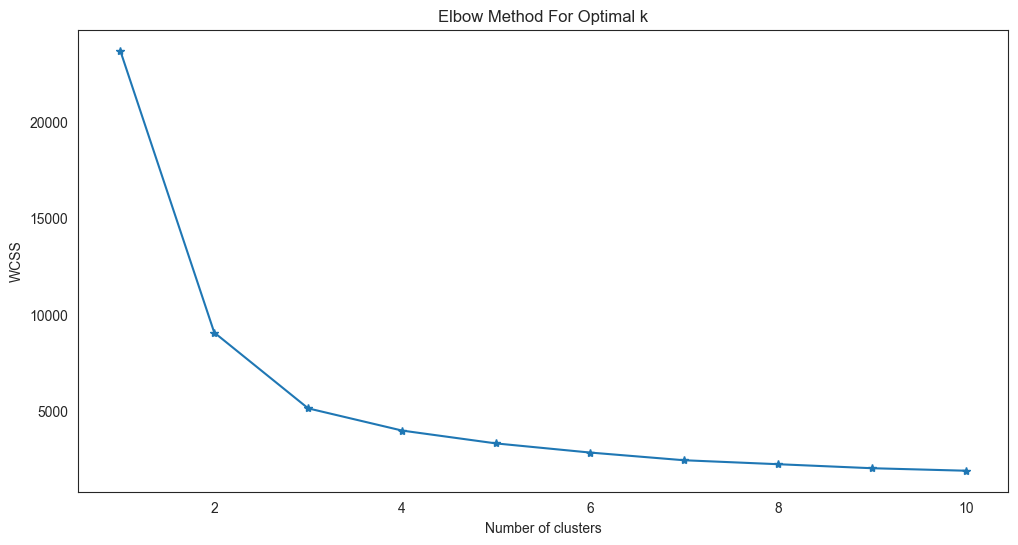

In [186]:
wcss = {}
# sns.set()
plt.figure(figsize=(12,6))
for i in range(1, 11):
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(pcadf)
    wcss[i] = km.inertia_

plt.plot(range(1, 11), list(wcss.values()), marker='*')
plt.title("Elbow Method For Optimal k")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

##### Report
**We are selection k == 3**

### Silhoutte Score plot for k means to choose best number of cluster

For n_clusters 3 The average silhoutte score is: 0.5104276776165199
For n_clusters 4 The average silhoutte score is: 0.4536650608591974
For n_clusters 5 The average silhoutte score is: 0.448912685841349
For n_clusters 6 The average silhoutte score is: 0.39526291532432256


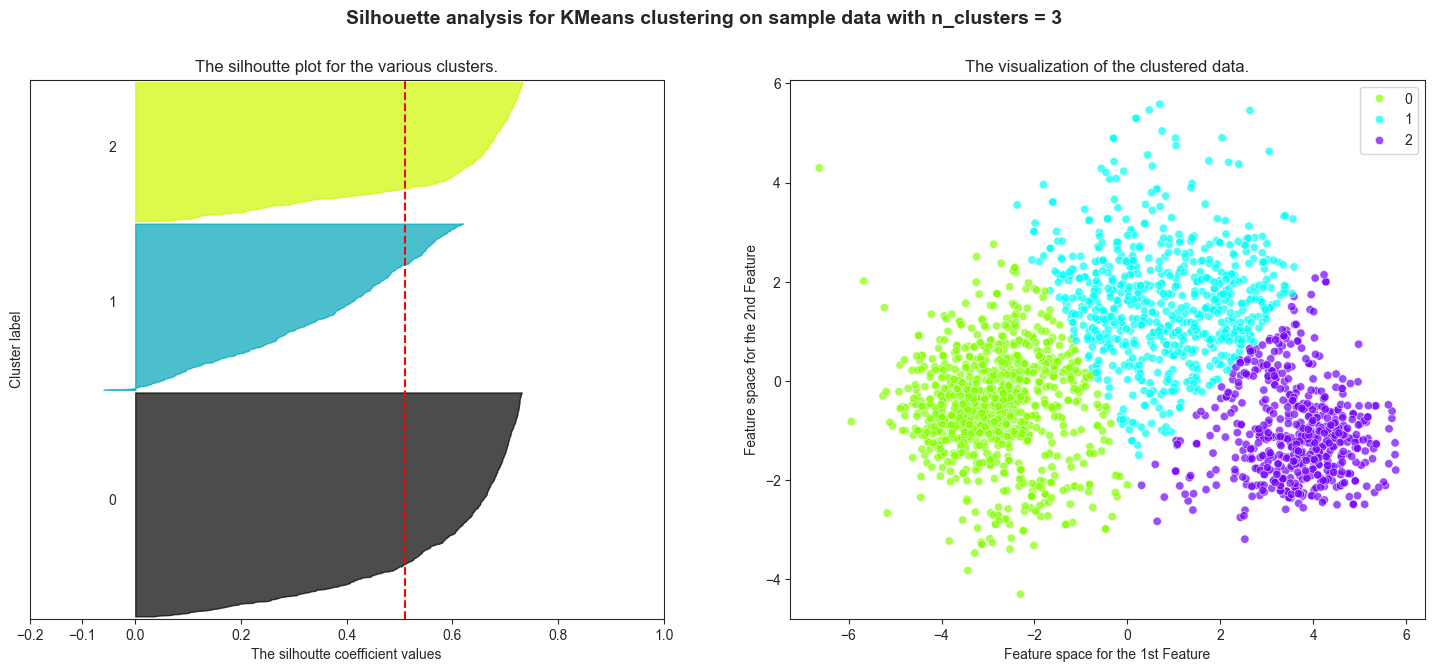

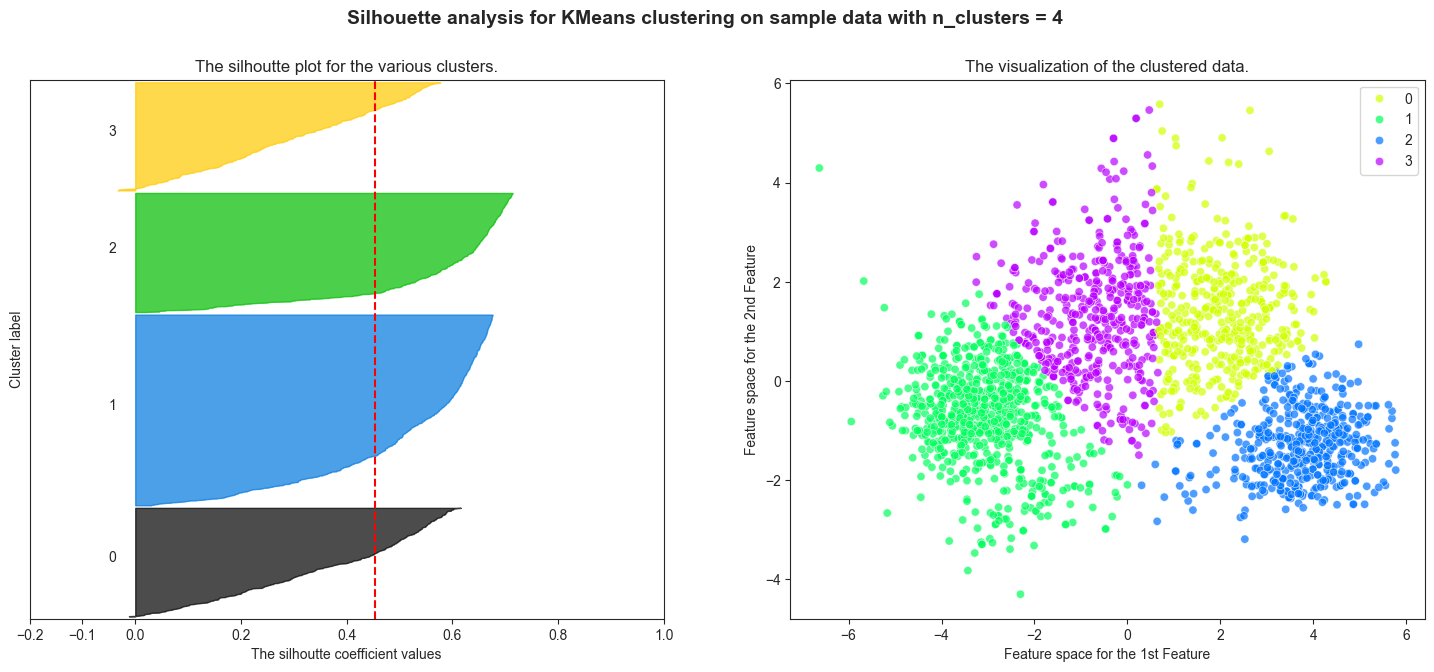

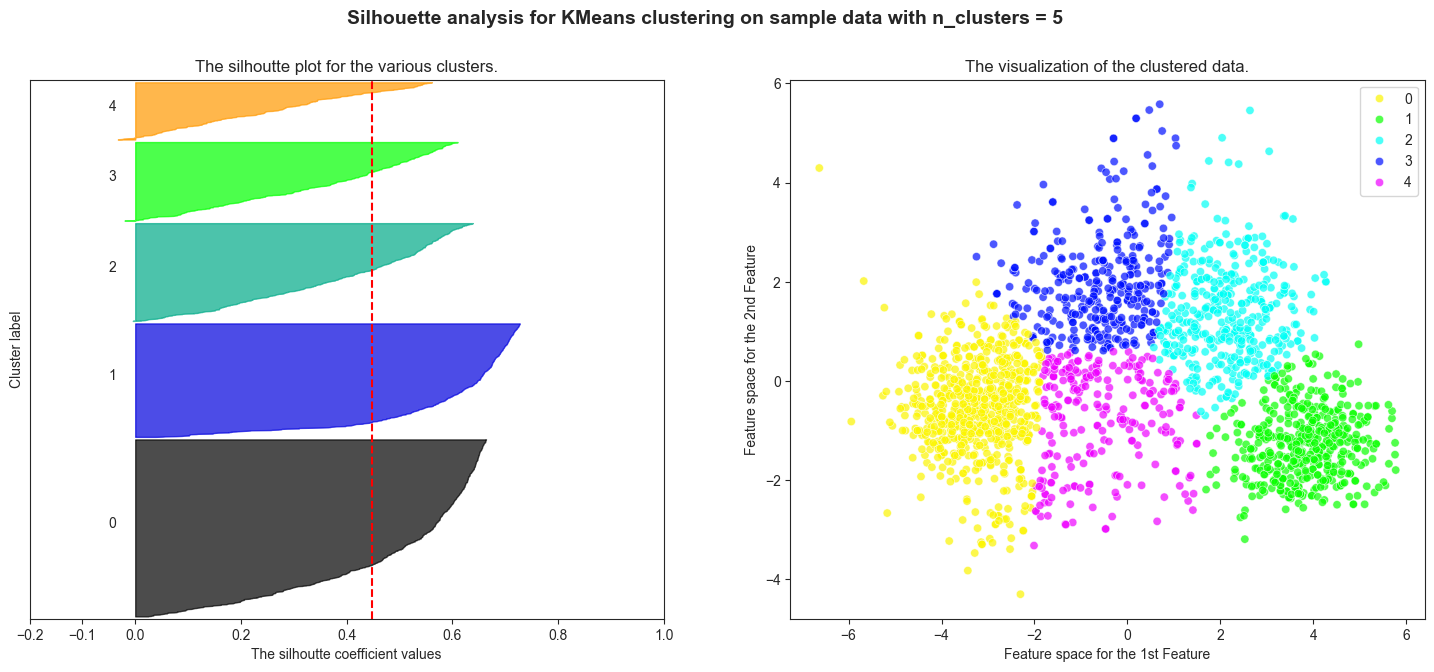

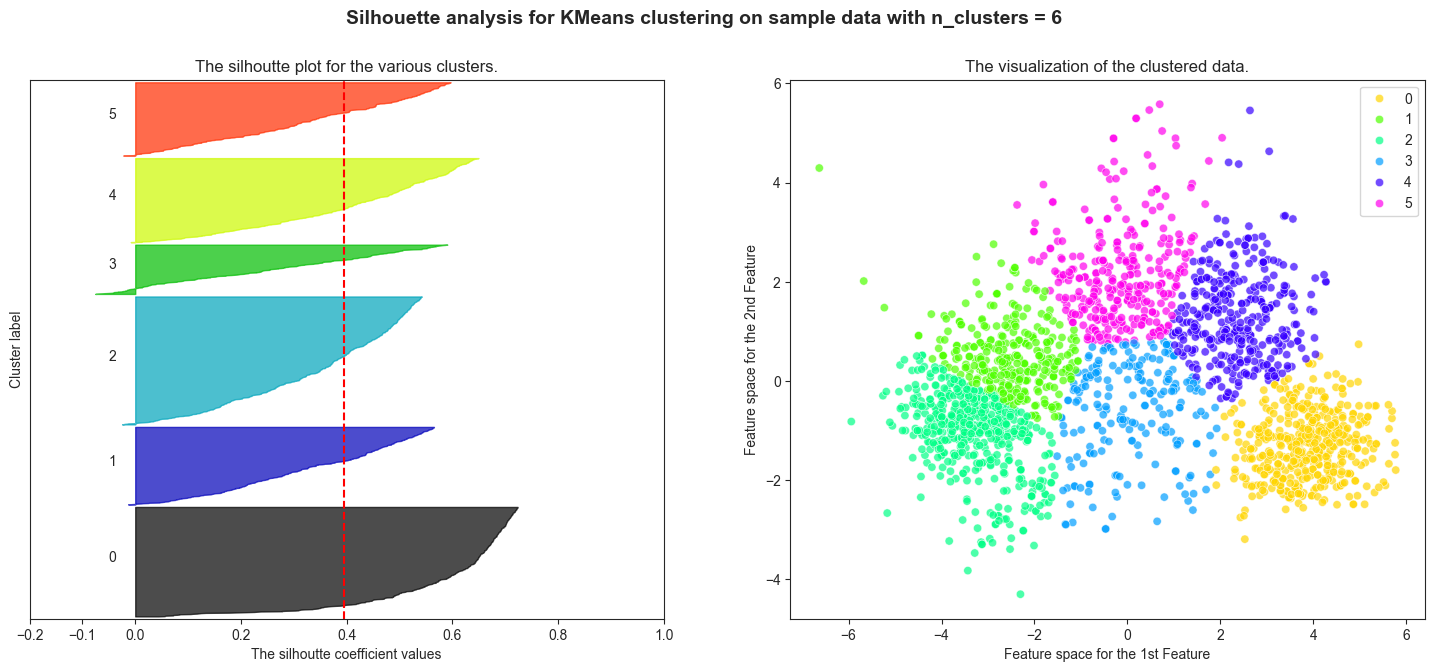

In [187]:
sns.set_style('ticks')
silhouette_plot(KMeans, range(3, 7), pcadf, reduced)

#### Apply Kmeans Clustering with 3 Clusters

In [188]:
model = KMeans(n_clusters=3).fit(pcadf)
model_label = model.labels_
model_centers = model.cluster_centers_

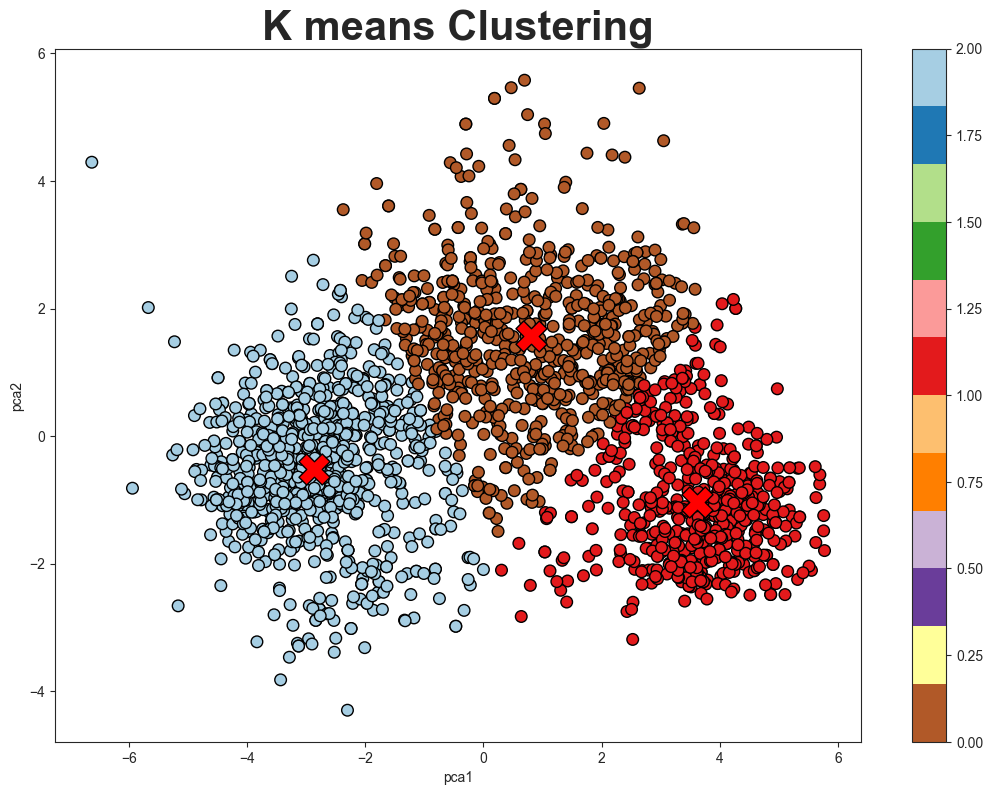

In [189]:
# Plotting the clusters
plt.figure(figsize=(13, 9))
plt.title("K means Clustering", weight='bold', size = 30)
plt.xlabel("pca1")
plt.ylabel("pca2")
scatter = plt.scatter(pcadf['PCA1'], pcadf['PCA2'], c=model_label, s = 70, cmap='Paired_r', ec='k')
plt.colorbar(scatter)
plt.scatter(model_centers[:, 0], model_centers[:, 1], c='red', s=500, marker='X', label='Centroids', ec ='k')

# Hierarchial Clustering (Agglomerative)

### Silhoutte Score plot for Agglomerative Clustering to chose best number of clusters

For n_clusters 3 The average silhoutte score is: 0.47317266130355123
For n_clusters 4 The average silhoutte score is: 0.4390868135630449
For n_clusters 5 The average silhoutte score is: 0.41652907940483375
For n_clusters 6 The average silhoutte score is: 0.3936313188733415
For n_clusters 7 The average silhoutte score is: 0.38969562696546983


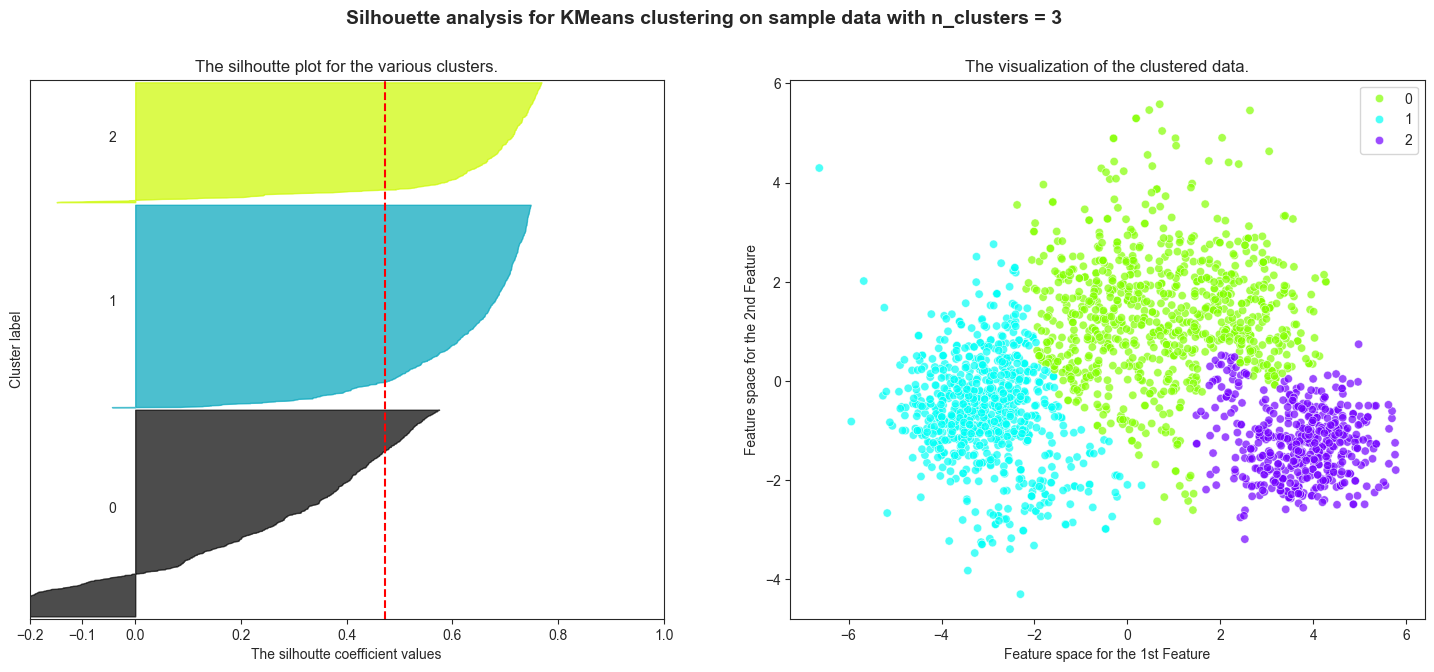

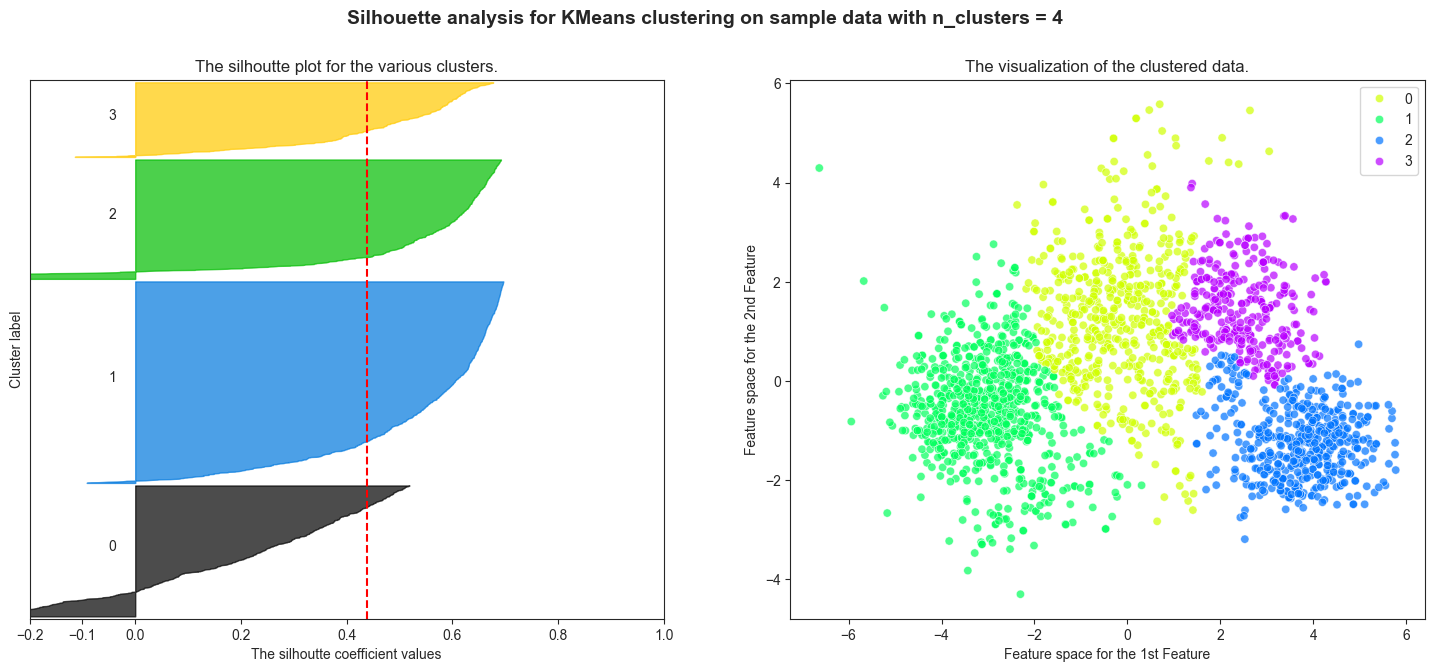

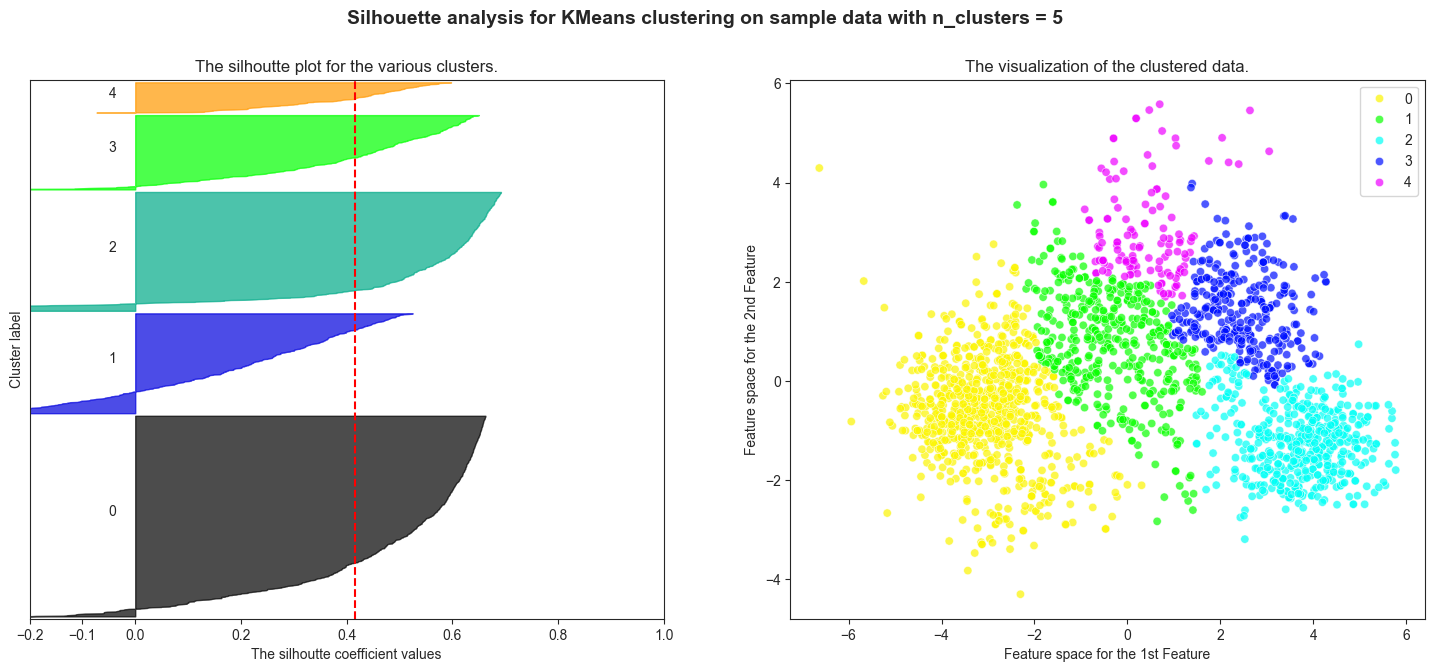

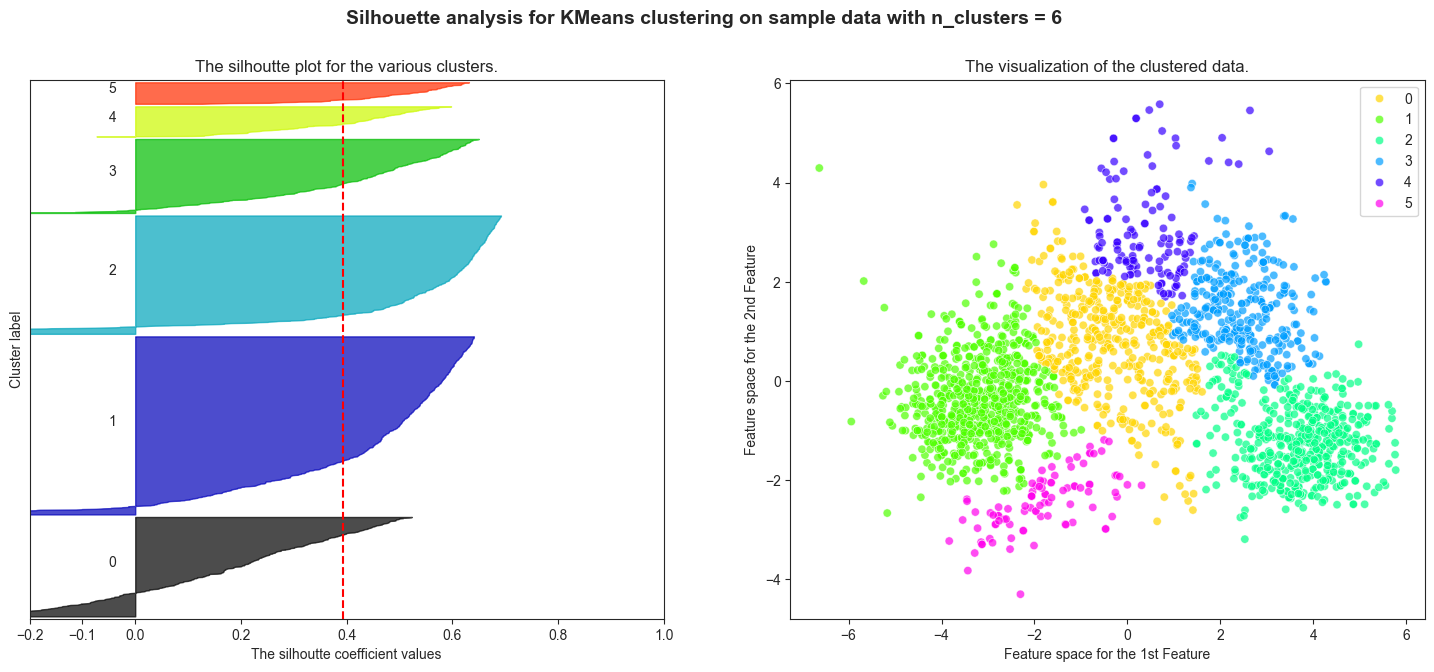

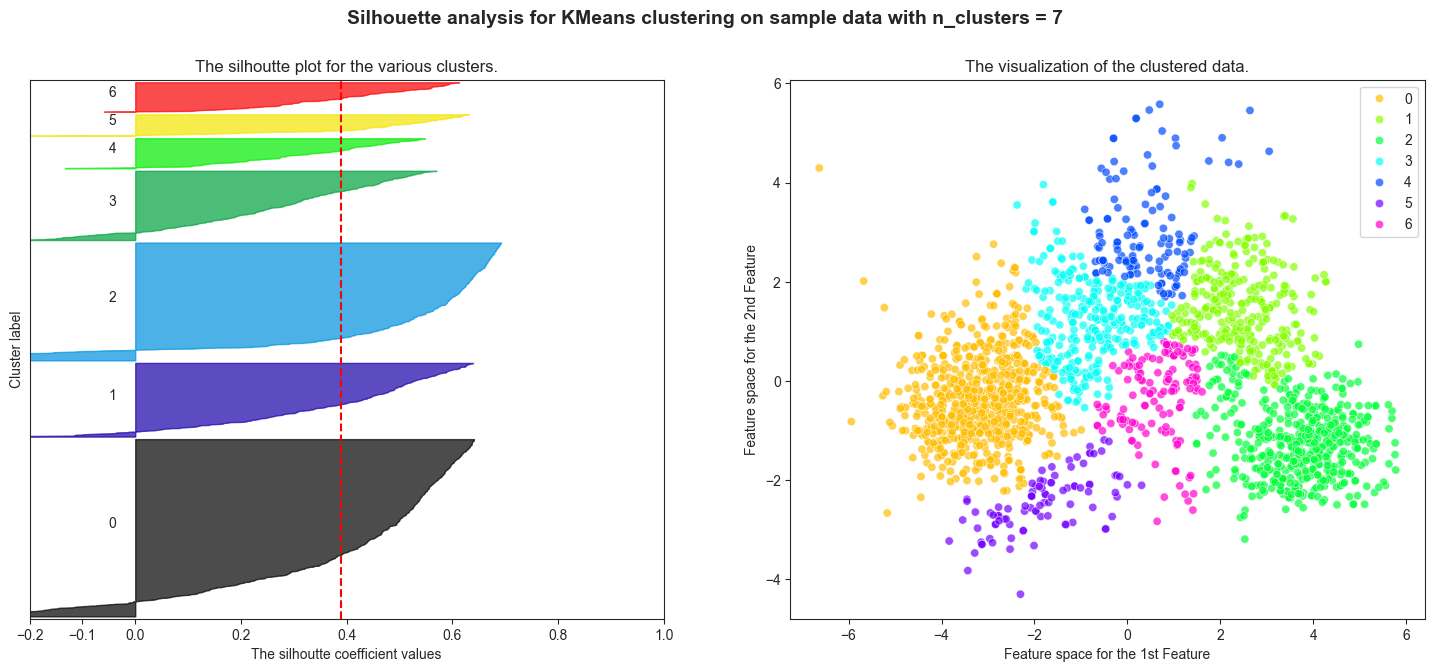

In [190]:
from sklearn.cluster import AgglomerativeClustering
silhouette_plot(AgglomerativeClustering, range(3, 8), pcadf, reduced)

**Same here we can see for cluster == 3 has highest silhoutte score**

In [191]:
model = AgglomerativeClustering(n_clusters=3).fit(pcadf)
model_label = model.labels_

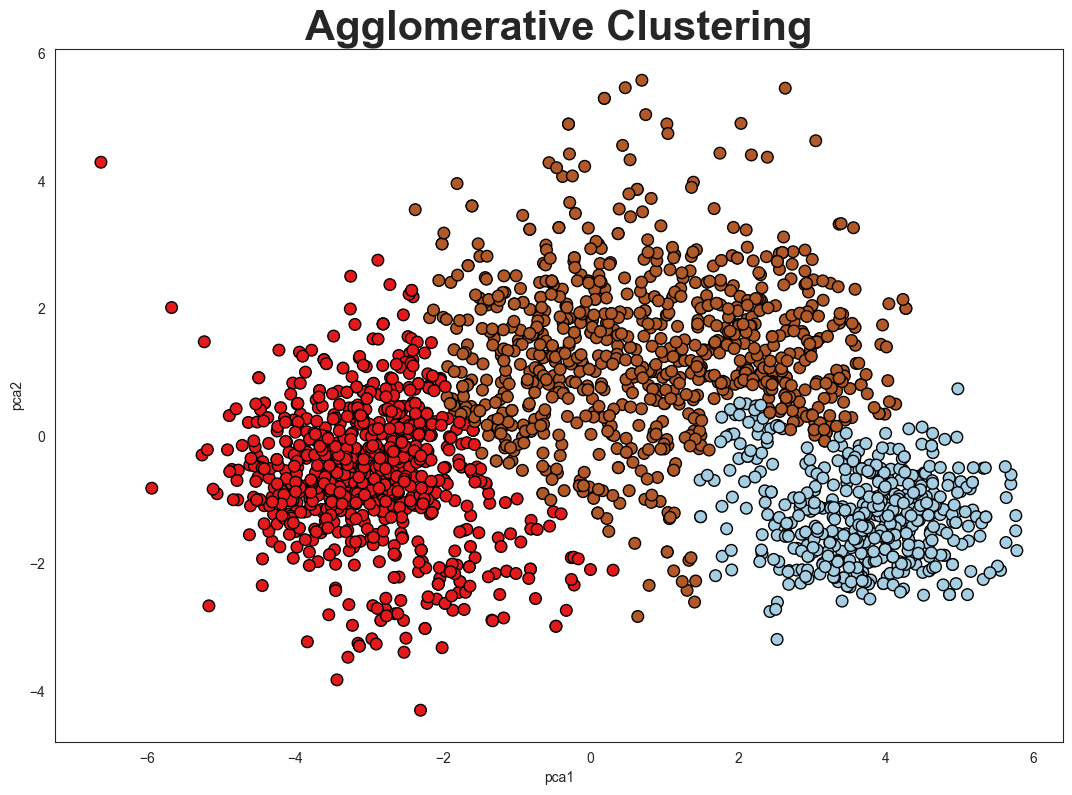

In [192]:
# Plotting the clusters
plt.figure(figsize=(13, 9))
sns.set_style('white')
plt.title("Agglomerative Clustering", weight='bold', size = 30)
plt.xlabel("pca1")
plt.ylabel("pca2")
scatter = plt.scatter(pcadf['PCA1'], pcadf['PCA2'], c=model_label, s = 70, cmap='Paired_r', ec='k')

# Gaussian Mixture

For n_clusters 3 The average silhoutte score is: 0.4768299385194117
For n_clusters 4 The average silhoutte score is: 0.4453698869231905
For n_clusters 5 The average silhoutte score is: 0.44544395453319297
For n_clusters 6 The average silhoutte score is: 0.369154783632761
For n_clusters 7 The average silhoutte score is: 0.3964932039685885


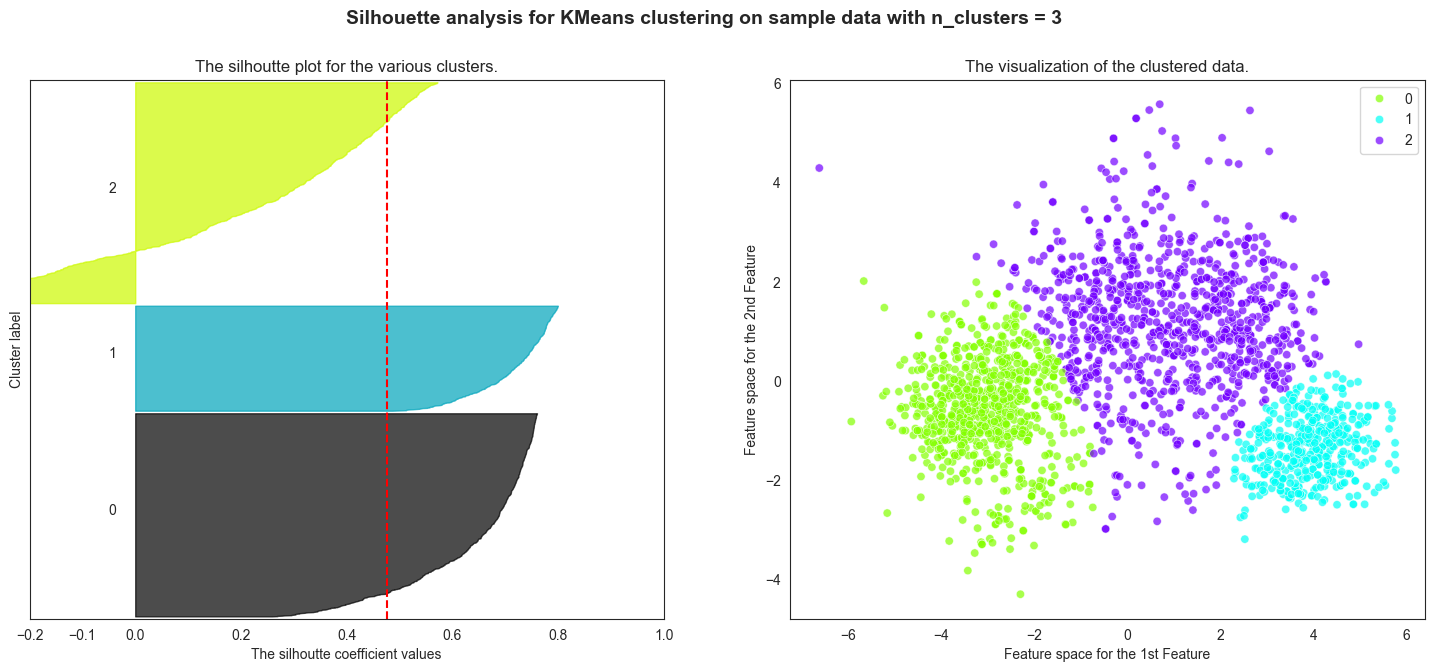

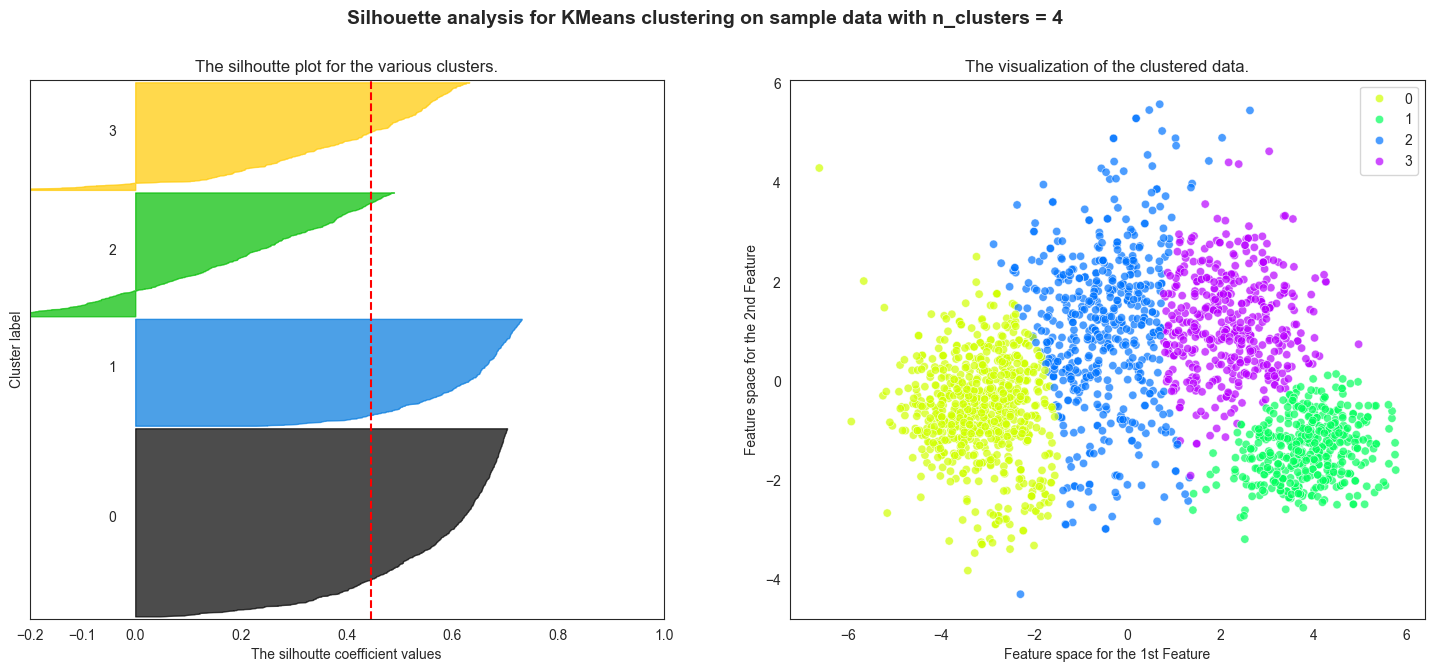

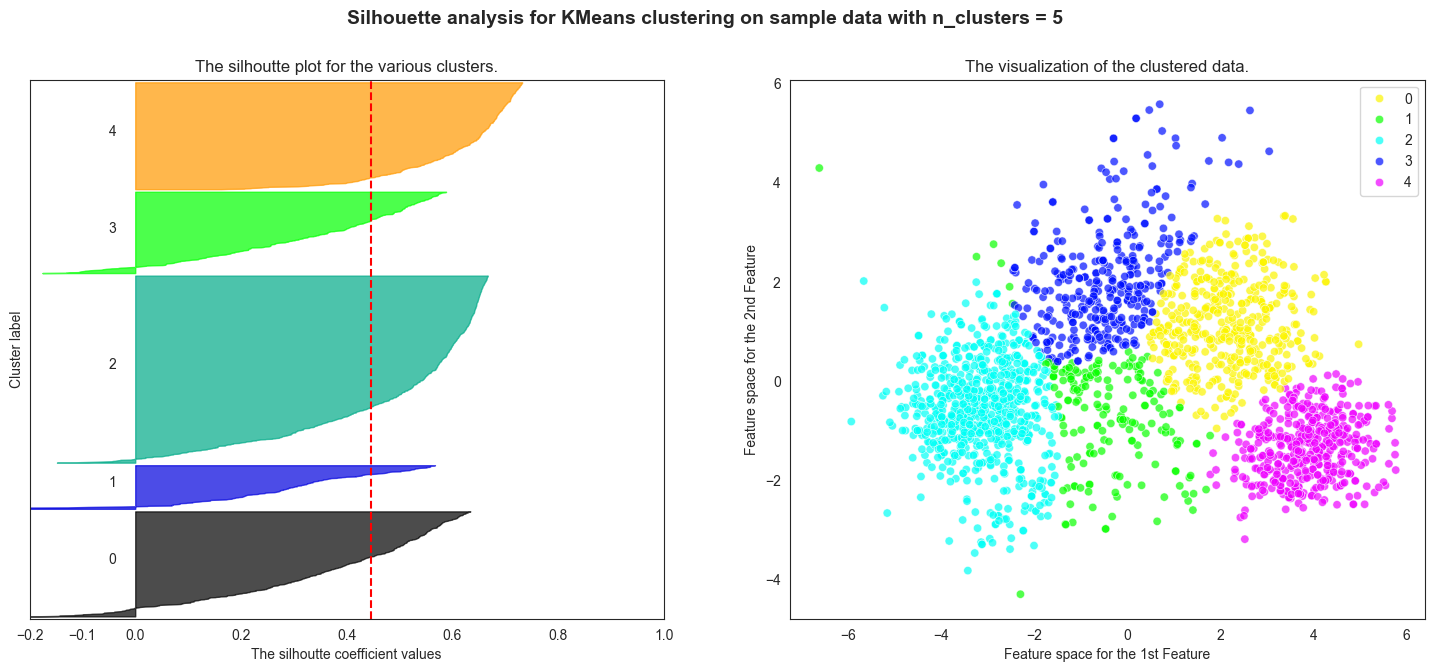

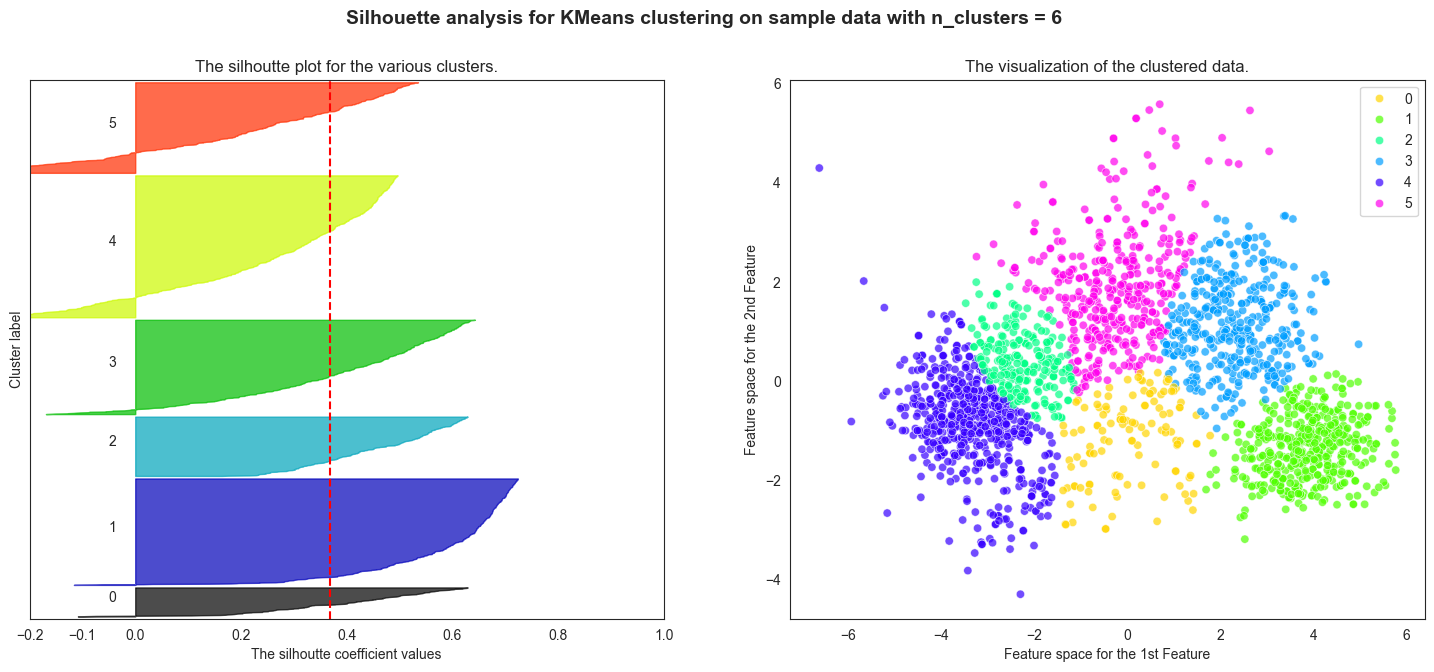

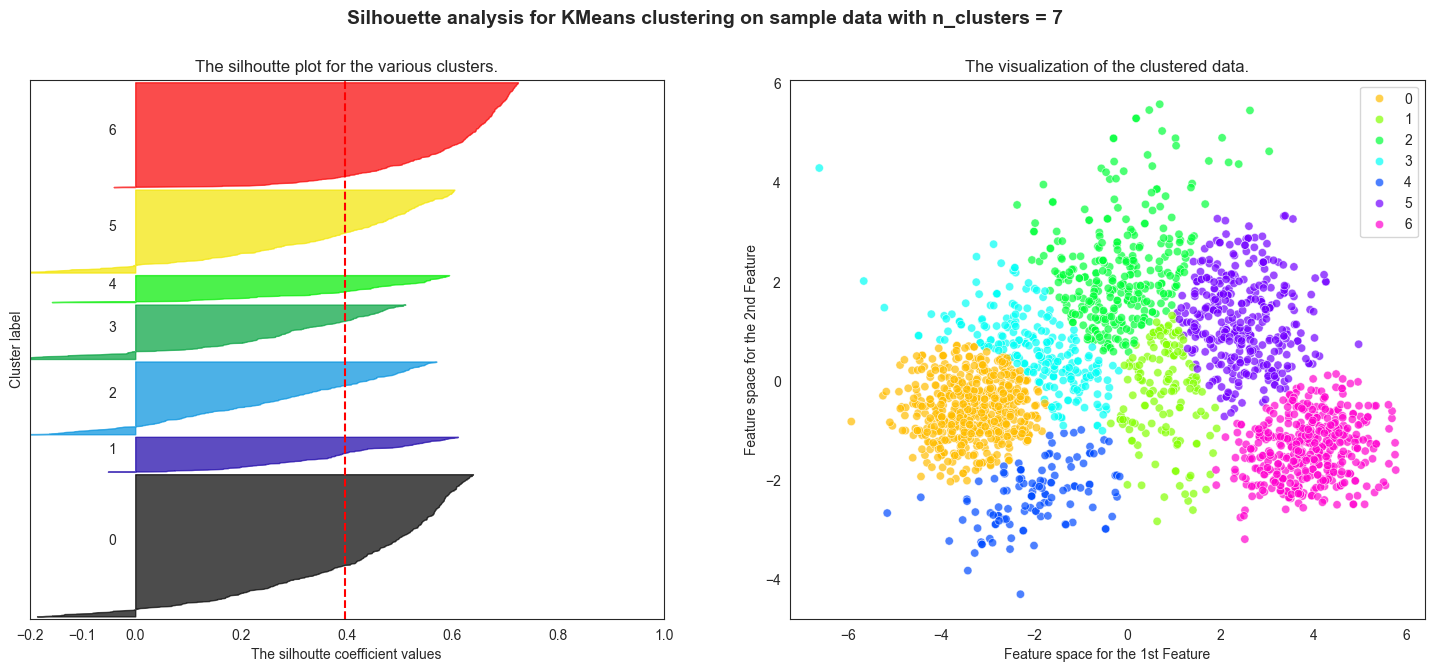

In [193]:
from sklearn.mixture import GaussianMixture
silhouette_plot(GaussianMixture, range(3, 8), pcadf, reduced)

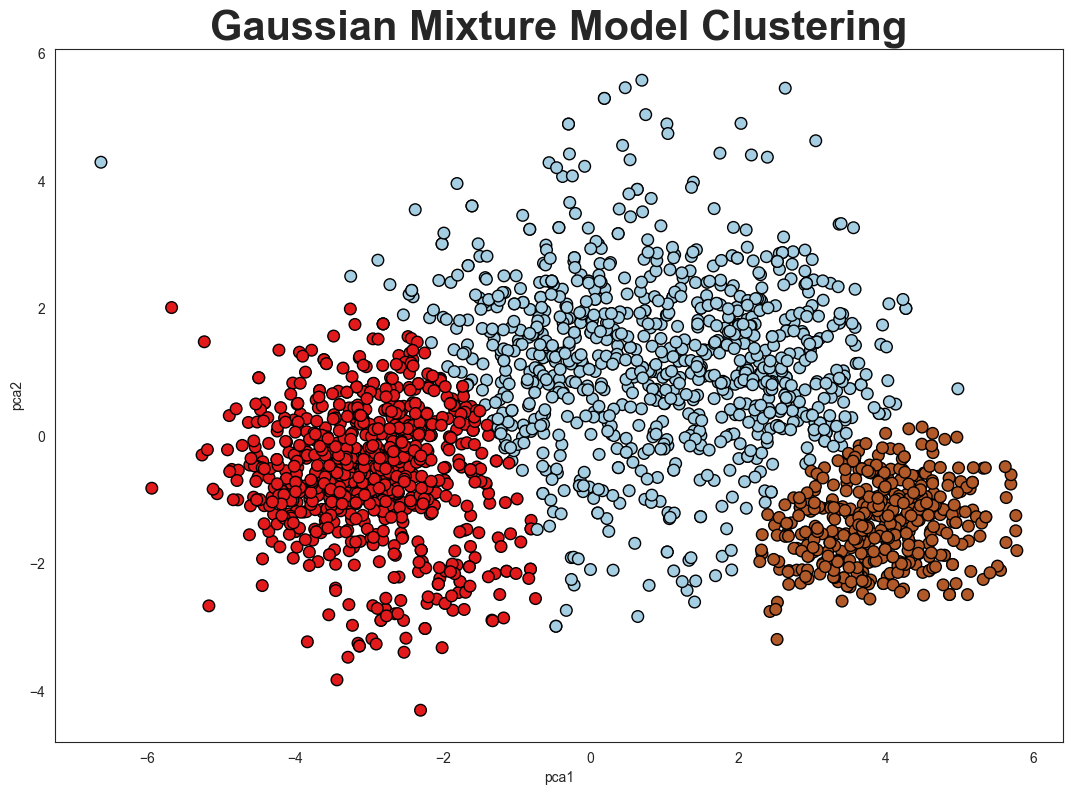

In [194]:
model = GaussianMixture(n_components=3).fit(reduced)
model_label = model.predict(reduced)

# Plotting the clusters
plt.figure(figsize=(13, 9))
sns.set_style('white')
plt.title("Gaussian Mixture Model Clustering", weight='bold', size = 30)
plt.xlabel("pca1")
plt.ylabel("pca2")
scatter = plt.scatter(pcadf['PCA1'], pcadf['PCA2'], c=model_label, s = 70, cmap='Paired_r', ec='k')

# DBSCAN

### Finding optimal value of Epsilon

In [195]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

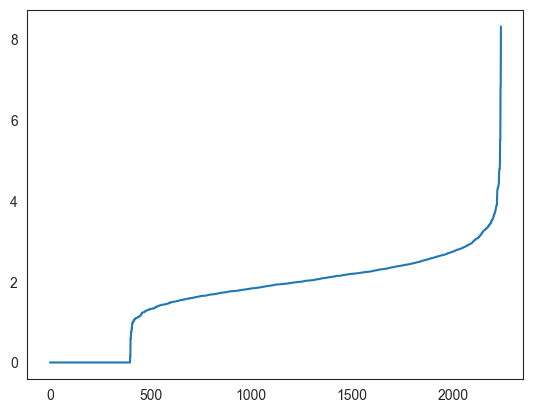

In [196]:
neighbors = NearestNeighbors(n_neighbors=17)
neighbors_fit = neighbors.fit(df_scaled)
distances, indices = neighbors_fit.kneighbors(df_scaled)

distances = np.sort(distances, axis=0)

distances = distances[:, 1]
plt.plot(distances)
plt.show()

### Kneedle Algorithm


[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


<Figure size 500x500 with 0 Axes>

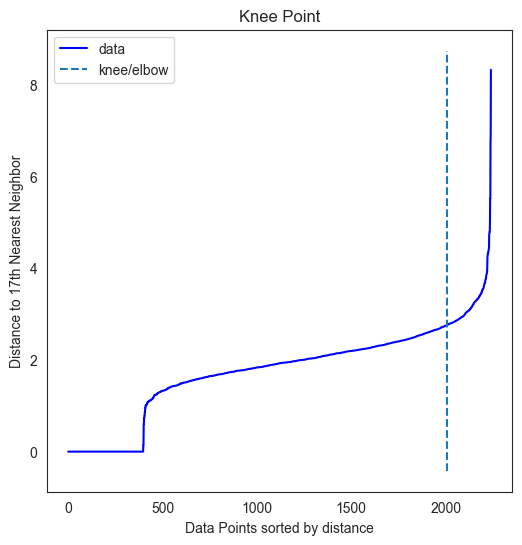

In [197]:
!pip install kneed

from kneed import KneeLocator

i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1.0, curve="convex", direction="increasing", interp_method="polynomial")

fig = plt.figure(figsize=(5,5))
knee.plot_knee()
plt.xlabel("Data Points sorted by distance")
plt.ylabel("Distance to 17th Nearest Neighbor")
plt.show()

In [198]:
print("Elbow at index:", knee.knee)

Elbow at index: 2008


For 2 dimensional data, use DBSCAN's default value of minPts = 4 

### Plot using PCA

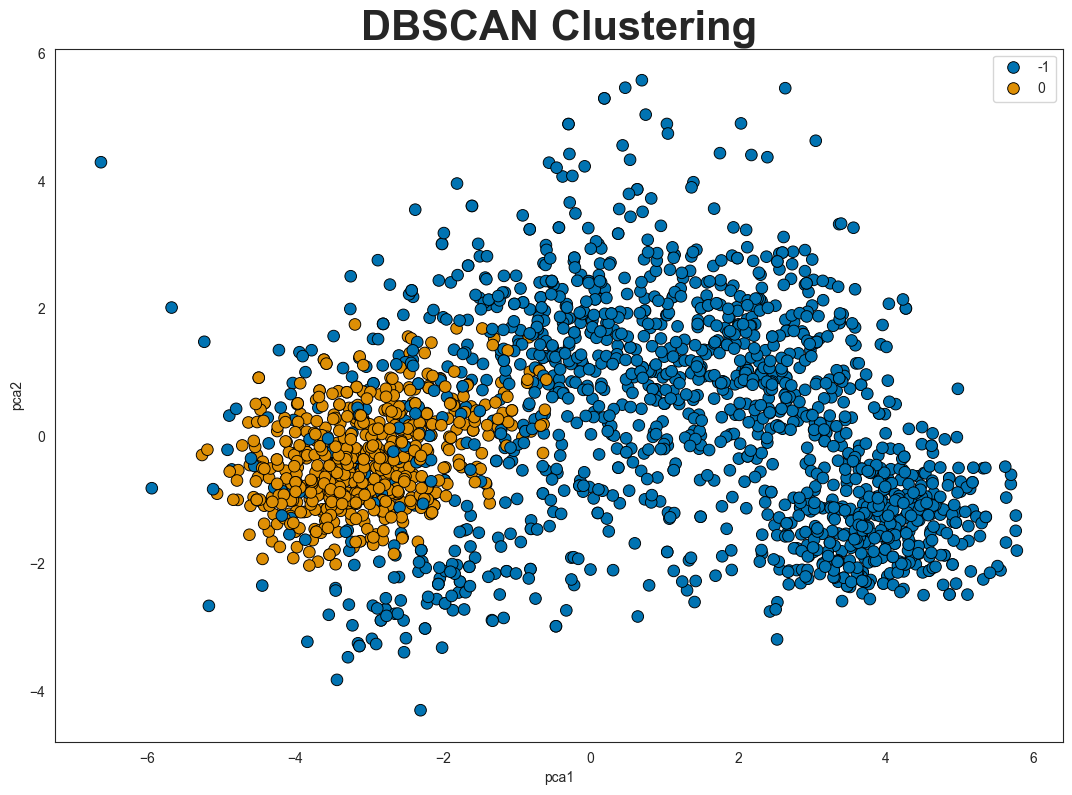

In [199]:
model = DBSCAN(eps=distances[knee.knee], min_samples=100).fit(df_scaled)
model_label = model.labels_

# Plotting the clusters
plt.figure(figsize=(13, 9))
sns.set_style('white')
plt.title("DBSCAN Clustering", weight='bold', size = 30)
plt.xlabel("pca1")
plt.ylabel("pca2")
scatter = sns.scatterplot(x=pcadf['PCA1'], y=pcadf['PCA2'], hue=model_label, palette='colorblind', s = 70, edgecolor='k')
plt.legend()

# Final Model

### Since Kmeans performed best

In [201]:
model = KMeans(n_clusters=3).fit(pcadf)
model_label = model.labels_
model_centers = model.cluster_centers_

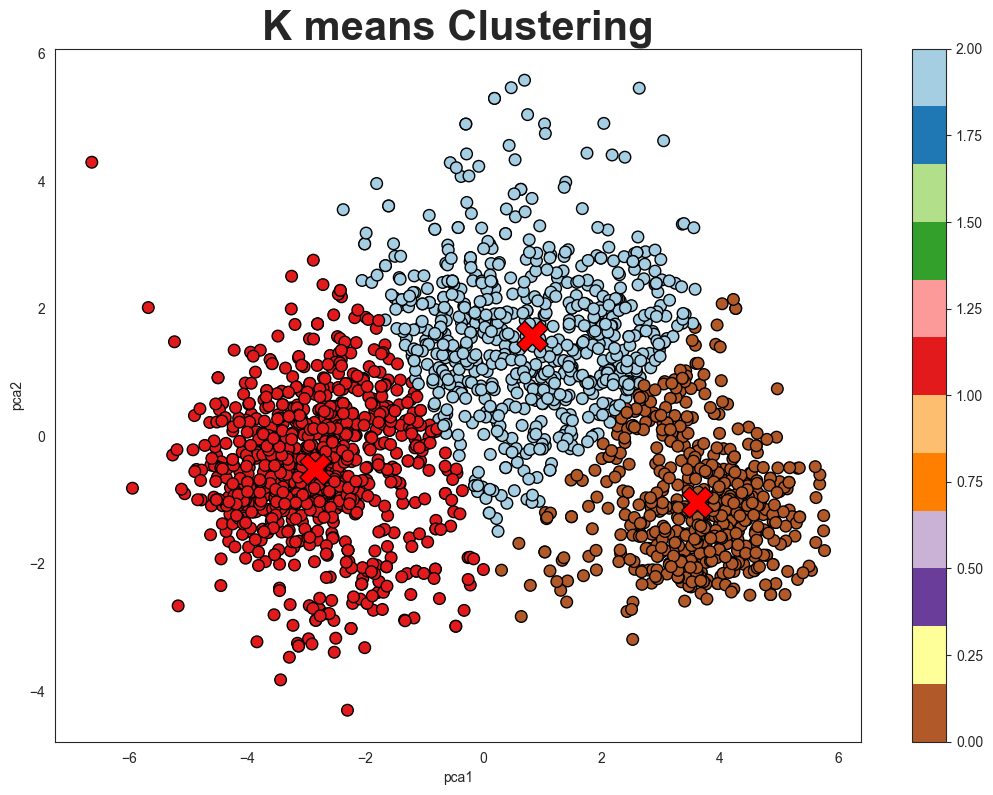

In [202]:
# Plotting the clusters
plt.figure(figsize=(13, 9))
plt.title("K means Clustering", weight='bold', size = 30)
plt.xlabel("pca1")
plt.ylabel("pca2")
scatter = plt.scatter(pcadf['PCA1'], pcadf['PCA2'], c=model_label, s = 70, cmap='Paired_r', ec='k')
plt.colorbar(scatter)
plt.scatter(model_centers[:, 0], model_centers[:, 1], c='red', s=500, marker='X', label='Centroids', ec ='k')


### Saving the data with new column named cluster

In [203]:
pcadf

PCA1      PCA2
0     4.130751  0.501059
1    -3.495848 -0.524323
2     3.032352 -0.850799
3    -2.794852 -1.108400
4     0.786683  0.794184
...        ...       ...
2235  2.432059  1.177710
2236 -1.606000  3.608996
2237  2.678885 -1.569945
2238  2.648399  0.601570
2239 -1.773257  1.811982

[2240 rows x 2 columns]

In [204]:
df

Age  Education  Marital Status  Parental Status  Children   Income  \
0      65          2               0                0         0  58138.0   
1      68          2               0                1         2  46344.0   
2      57          2               1                0         0  71613.0   
3      38          2               1                1         1  26646.0   
4      41          4               1                1         1  58293.0   
...   ...        ...             ...              ...       ...      ...   
2235   55          2               1                1         1  61223.0   
2236   76          4               1                1         3  64014.0   
2237   41          2               0                0         0  56981.0   
2238   66          3               1                1         1  69245.0   
2239   68          4               1                1         2  52869.0   

      Total_Spending  Days_as_Customer  Recency  Wines  ...  Meat   Fish  \
0             1617.0            4872.0       58    635  ...   546  120.5   
1               27.0            4322.0       38     11  ...     6    2.0   
2              776.0            4521.0       26    426  ...   127  111.0   
3               53.0            4348.0       26     11  ...    20   10.0   
4              422.0            4370.0       94    173  ...   118   46.0   
...              ...               ...      ...    ...  ...   ...    ...   
2235          1341.0            4590.0       46    709  ...   182   42.0   
2236           444.0            4228.0       56    406  ...    30    0.0   
2237          1241.0            4364.0       91    908  ...   217   32.0   
2238           843.0            4365.0        8    428  ...   214   80.0   
2239           172.0            4831.0       40     84  ...    61    2.0   

      Sweets   Gold  Web  Catalog  Store  Discount Purchases  Total Promo  \
0         81   88.0    8       10      4                   3            0   
1          1    6.0    1        1      2                   2            0   
2         21   42.0    8        2     10                   1            0   
3          3    5.0    2        0      4                   2            0   
4         27   15.0    5        3      6                   5            0   
...      ...    ...  ...      ...    ...                 ...          ...   
2235      81  126.5    9        3      4                   2            0   
2236       0    8.0    8        2      5                   7            1   
2237      12   24.0    2        3     13                   1            1   
2238      30   61.0    6        5     10                   2            0   
2239       1   21.0    3        1      4                   3            0   

      NumWebVisitsMonth  
0                     7  
1                     5  
2                     4  
3                     6  
4                     5  
...                 ...  
2235                  5  
2236                  7  
2237                  6  
2238                  3  
2239                  7  

[2240 rows x 21 columns]

In [205]:
df['Cluster'] = model_label
df

Age  Education  Marital Status  Parental Status  Children   Income  \
0      65          2               0                0         0  58138.0   
1      68          2               0                1         2  46344.0   
2      57          2               1                0         0  71613.0   
3      38          2               1                1         1  26646.0   
4      41          4               1                1         1  58293.0   
...   ...        ...             ...              ...       ...      ...   
2235   55          2               1                1         1  61223.0   
2236   76          4               1                1         3  64014.0   
2237   41          2               0                0         0  56981.0   
2238   66          3               1                1         1  69245.0   
2239   68          4               1                1         2  52869.0   

      Total_Spending  Days_as_Customer  Recency  Wines  ...   Fish  Sweets  \
0             1617.0            4872.0       58    635  ...  120.5      81   
1               27.0            4322.0       38     11  ...    2.0       1   
2              776.0            4521.0       26    426  ...  111.0      21   
3               53.0            4348.0       26     11  ...   10.0       3   
4              422.0            4370.0       94    173  ...   46.0      27   
...              ...               ...      ...    ...  ...    ...     ...   
2235          1341.0            4590.0       46    709  ...   42.0      81   
2236           444.0            4228.0       56    406  ...    0.0       0   
2237          1241.0            4364.0       91    908  ...   32.0      12   
2238           843.0            4365.0        8    428  ...   80.0      30   
2239           172.0            4831.0       40     84  ...    2.0       1   

       Gold  Web  Catalog  Store  Discount Purchases  Total Promo  \
0      88.0    8       10      4                   3            0   
1       6.0    1        1      2                   2            0   
2      42.0    8        2     10                   1            0   
3       5.0    2        0      4                   2            0   
4      15.0    5        3      6                   5            0   
...     ...  ...      ...    ...                 ...          ...   
2235  126.5    9        3      4                   2            0   
2236    8.0    8        2      5                   7            1   
2237   24.0    2        3     13                   1            1   
2238   61.0    6        5     10                   2            0   
2239   21.0    3        1      4                   3            0   

      NumWebVisitsMonth  Cluster  
0                     7        0  
1                     5        1  
2                     4        0  
3                     6        1  
4                     5        2  
...                 ...      ...  
2235                  5        2  
2236                  7        2  
2237                  6        0  
2238                  3        0  
2239                  7        1  

[2240 rows x 22 columns]

In [206]:
import os
os.makedirs('data', exist_ok=True)
df.to_csv('data/customer_segments.csv', index=False)

# Final Report

* Kmeans Performed well compared to others
